In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.functional import to_tensor, to_pil_image
from captcha.image import ImageCaptcha
from tqdm import tqdm
import string
import random
import numpy as np
from collections import OrderedDict
from Utils import CaptchaDataset, Model, train, valid, decode, decode_target, calc_acc

In [2]:
characters = "-" + string.digits + string.ascii_uppercase
width, height, n_len, n_classes = 192, 64, 4, len(characters)
n_input_length = 12
print(characters, width, height, n_len, n_classes)

-0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ 192 64 4 37


7HHW tensor([12]) tensor([4])


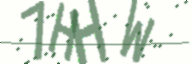

In [3]:
dataset = CaptchaDataset(characters, 1, width, height, n_input_length, n_len)
image, target, input_length, label_length = dataset[0]
print("".join([characters[x] for x in target]), input_length, label_length)
to_pil_image(image)

In [4]:
batch_size = 70
train_set = CaptchaDataset(
    characters, 1000 * batch_size, width, height, n_input_length, n_len
)
valid_set = CaptchaDataset(
    characters, 100 * batch_size, width, height, n_input_length, n_len
)
train_loader = DataLoader(train_set, batch_size=batch_size, num_workers=2)
valid_loader = DataLoader(valid_set, batch_size=batch_size, num_workers=2)

In [5]:
model = Model(n_classes, input_shape=(3, height, width))
inputs = torch.zeros((32, 3, height, width))
outpus = model(inputs)
outpus.shape

torch.Size([12, 32, 37])

In [6]:
model = Model(n_classes, input_shape=(3, height, width))
model = model.cuda()
model

Model(
  (cnn): Sequential(
    (conv11): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu11): ReLU(inplace=True)
    (conv12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn12): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu12): ReLU(inplace=True)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv21): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn21): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu21): ReLU(inplace=True)
    (conv22): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn22): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu22): ReLU(inplace=True)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilati

In [7]:
optimizer = torch.optim.Adam(model.parameters(), 1e-3, amsgrad=True)
epochs = 6
for epoch in range(1, epochs + 1):
    train(model, optimizer, epoch, train_loader, characters)
    valid(model, optimizer, epoch, valid_loader, characters)
optimizer = torch.optim.Adam(model.parameters(), 1e-4, amsgrad=True)
epochs = 3
for epoch in range(1, epochs + 1):
    train(model, optimizer, epoch, train_loader, characters)
    valid(model, optimizer, epoch, valid_loader, characters)

Test : 3 Loss: 0.0171 Acc: 0.9539 : 100%|██████████| 100/100 [00:42<00:00,  2.34it/s]


In [9]:
def decode_targ(sequence):
    return "".join([characters[x] for x in sequence]).replace(" ", "")

In [11]:
def decode_main(sequence):
    a = ''.join([characters[x] for x in sequence])
    s = ''.join([x for j, x in enumerate(a[:-1]) if x != characters[0] and x != a[j+1]])
    if len(s) == 0:
        return ''
    if a[-1] != characters[0] and s[-1] != a[-1]:
        s += a[-1]
    return s

In [13]:
model.eval()
output = model(image.unsqueeze(0).cuda())
output_argmax = output.detach().permute(1, 0, 2).argmax(dim=-1)
do = True
while do or decode_targ(target) == decode_main(output_argmax[0]):
    do = False
    image, target, input_length, label_length = dataset[0]
    print("true: ", decode_targ(target))
    output = model(image.unsqueeze(0).cuda())
    output_argmax = output.detach().permute(1, 0, 2).argmax(dim=-1)
    print("pred:", decode_main(output_argmax[0]))
to_pil_image(image)
torch.save(model, "ctc3.pth")

true:  INH9
pred: INH9
true:  EZYD
pred: EZYD
true:  LI31
pred: LI31
true:  VIZA
pred: VIZA
true:  92DE
pred: 92DE
true:  IRXN
pred: IRXN
true:  KHMT
pred: KHMT
true:  CBYN
pred: CBYN
true:  JPR8
pred: JPR8
true:  7O2V
pred: 7O2V
true:  I3J8
pred: I3J8
true:  DH2X
pred: DH2X
true:  C8YK
pred: C8YK
true:  S41Y
pred: S41Y
true:  BSCH
pred: BSCH
true:  KF1N
pred: KF1N
true:  7SFS
pred: 7SFS
true:  CBQP
pred: CBQP
true:  RNCI
pred: RNCI
true:  TLFD
pred: TLFD
true:  8SUO
pred: 8SUO
true:  HUY8
pred: HUY8
true:  Z7O7
pred: Z7O7
true:  BGRV
pred: BGRV
true:  XPCC
pred: XPC
